# Chapter 3: A Deep Dive into Tokenization with Hugging Face
## Introduction
Welcome to this interactive guide where we will walk through setting up a robust environment for working with Hugging Face transformers and explore the fundamentals of tokenization. This notebook is a companion to the article on setting up your Hugging Face environment and provides hands-on examples.

In [1]:
import warnings
import pandas as pd
import numpy as np
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_theme()

## Basic Tokenization Examples

Let's start with basic tokenization using different tokenizers.

In [2]:
# Load a basic tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example text
text = "Hello, how are you doing today? I hope you're having a great day!"

# Tokenize
tokens = tokenizer.tokenize(text)
print(f"Original text: {text}")
print(f"\nTokens: {tokens}")
print(f"\nNumber of tokens: {len(tokens)}")

Original text: Hello, how are you doing today? I hope you're having a great day!

Tokens: ['hello', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'i', 'hope', 'you', "'", 're', 'having', 'a', 'great', 'day', '!']

Number of tokens: 18


In [3]:
# Convert tokens to IDs and back
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f"Token IDs: {token_ids}")

# Convert back to tokens
decoded_tokens = tokenizer.convert_ids_to_tokens(token_ids)
print(f"\nDecoded tokens: {decoded_tokens}")

# Decode to text
decoded_text = tokenizer.decode(token_ids)
print(f"\nDecoded text: {decoded_text}")

Token IDs: [7592, 1010, 2129, 2024, 2017, 2725, 2651, 1029, 1045, 3246, 2017, 1005, 2128, 2383, 1037, 2307, 2154, 999]

Decoded tokens: ['hello', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'i', 'hope', 'you', "'", 're', 'having', 'a', 'great', 'day', '!']

Decoded text: hello, how are you doing today? i hope you're having a great day!


## Subword Tokenization

Explore different subword tokenization approaches.

In [4]:
# Compare different tokenizers
models = [
    "bert-base-uncased",  # WordPiece
    "gpt2",               # BPE
    "xlnet-base-cased"    # SentencePiece
]

test_text = "Tokenization is fascinating!"

for model_name in models:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens = tokenizer.tokenize(test_text)
    print(f"\n{model_name}:")
    print(f"  Tokens: {tokens}")
    print(f"  Count: {len(tokens)}")


bert-base-uncased:
  Tokens: ['token', '##ization', 'is', 'fascinating', '!']
  Count: 5

gpt2:
  Tokens: ['Token', 'ization', 'Ġis', 'Ġfascinating', '!']
  Count: 5


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]


xlnet-base-cased:
  Tokens: ['▁To', 'ken', 'ization', '▁is', '▁fascinating', '!']
  Count: 6


## Advanced Tokenization Features

Explore padding, truncation, and special tokens.

In [5]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Multiple texts of different lengths
texts = [
    "Short text.",
    "This is a medium length text that contains more words.",
    "This is a very long text that contains many words and will demonstrate how padding and truncation work in practice when dealing with sequences of different lengths."
]

# Tokenize with padding and truncation
encoded = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=20,
    return_tensors="pt"
)

print("Input IDs shape:", encoded['input_ids'].shape)
print("\nInput IDs:")
print(encoded['input_ids'])
print("\nAttention mask:")
print(encoded['attention_mask'])

Input IDs shape: torch.Size([3, 20])

Input IDs:
tensor([[  101,  2460,  3793,  1012,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  2023,  2003,  1037,  5396,  3091,  3793,  2008,  3397,  2062,
          2616,  1012,   102,     0,     0,     0,     0,     0,     0,     0],
        [  101,  2023,  2003,  1037,  2200,  2146,  3793,  2008,  3397,  2116,
          2616,  1998,  2097, 10580,  2129, 11687,  4667,  1998, 19817,   102]])

Attention mask:
tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


## Tokenizer Comparison

Compare tokenization across different models.

In [6]:
# Complex text with various challenges
complex_text = "The quick brown fox jumps over the lazy dog. Email: fox@example.com. Price: $123.45. 🦊🐕"

tokenizer_names = ["bert-base-uncased", "gpt2", "roberta-base"]
results = []

for name in tokenizer_names:
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokens = tokenizer.tokenize(complex_text)
    results.append({
        "Model": name,
        "Token Count": len(tokens),
        "Vocab Size": tokenizer.vocab_size,
        "Sample Tokens": str(tokens[:10])
    })

df = pd.DataFrame(results)
print(df.to_string(index=False))

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

            Model  Token Count  Vocab Size                                                                        Sample Tokens
bert-base-uncased           26       30522         ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
             gpt2           31       50257 ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
     roberta-base           31       50265 ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']


## Visualization of Tokenization

Visualize how different tokenizers handle text.

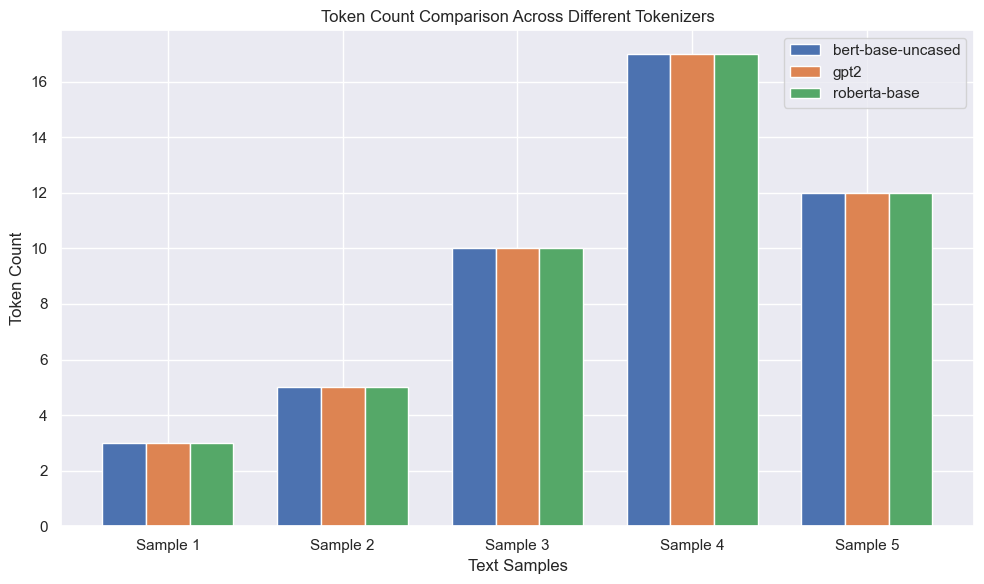

In [7]:
# Analyze token lengths for different models
text_samples = [
    "Hello world!",
    "Machine learning is amazing.",
    "The quick brown fox jumps over the lazy dog.",
    "Supercalifragilisticexpialidocious is a very long word.",
    "Email me at user@example.com for more information."
]

model_names = ["bert-base-uncased", "gpt2", "roberta-base"]
token_counts = {model: [] for model in model_names}

for model_name in model_names:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    for text in text_samples:
        tokens = tokenizer.tokenize(text)
        token_counts[model_name].append(len(tokens))

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(text_samples))
width = 0.25

for i, (model, counts) in enumerate(token_counts.items()):
    ax.bar(x + i * width, counts, width, label=model)

ax.set_xlabel('Text Samples')
ax.set_ylabel('Token Count')
ax.set_title('Token Count Comparison Across Different Tokenizers')
ax.set_xticks(x + width)
ax.set_xticklabels([f'Sample {i+1}' for i in range(len(text_samples))])
ax.legend()
plt.tight_layout()
plt.show()

## Special Tokens and Token Types

Understanding special tokens used by different models.

In [8]:
# Examine special tokens
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

print("Special tokens:")
print(f"  PAD token: {tokenizer.pad_token} (ID: {tokenizer.pad_token_id})")
print(f"  UNK token: {tokenizer.unk_token} (ID: {tokenizer.unk_token_id})")
print(f"  CLS token: {tokenizer.cls_token} (ID: {tokenizer.cls_token_id})")
print(f"  SEP token: {tokenizer.sep_token} (ID: {tokenizer.sep_token_id})")
print(f"  MASK token: {tokenizer.mask_token} (ID: {tokenizer.mask_token_id})")

# Demonstrate token type IDs for sentence pairs
text_a = "This is the first sentence."
text_b = "This is the second sentence."

encoded = tokenizer(text_a, text_b, return_tensors="pt")
print("\nEncoded sentence pair:")
print(f"Input IDs: {encoded['input_ids'][0].tolist()}")
print(f"Token type IDs: {encoded['token_type_ids'][0].tolist()}")
print(f"\nDecoded: {tokenizer.decode(encoded['input_ids'][0])}")

Special tokens:
  PAD token: [PAD] (ID: 0)
  UNK token: [UNK] (ID: 100)
  CLS token: [CLS] (ID: 101)
  SEP token: [SEP] (ID: 102)
  MASK token: [MASK] (ID: 103)

Encoded sentence pair:
Input IDs: [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 6251, 1012, 102]
Token type IDs: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Decoded: [CLS] this is the first sentence. [SEP] this is the second sentence. [SEP]


## Handling Out-of-Vocabulary Words

See how different tokenizers handle unknown words.

In [ ]:
# Test with made-up words
test_texts = [
    "The flibbertigibbet jumped over the moon.",
    "Pneumonoultramicroscopicsilicovolcanoconiosis is a lung disease.",
    "The 🦄 and 🌈 are beautiful."
]

for model_name in ["bert-base-uncased", "gpt2", "roberta-base"]:
    print(f"\n{model_name}:")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # Get UNK token for this tokenizer
    unk_token = tokenizer.unk_token
    print(f"  UNK token: {unk_token}")
    
    for text in test_texts:
        tokens = tokenizer.tokenize(text)
        # Truncate display for long texts
        display_text = text if len(text) <= 30 else text[:30] + "..."
        print(f"  '{display_text}' -> {len(tokens)} tokens")
        
        # Check for UNK tokens
        if unk_token and unk_token in tokens:
            unk_count = tokens.count(unk_token)
            print(f"    Contains {unk_count} UNK token(s)!")
        
        # Show first few tokens to see how it's handled
        print(f"    First tokens: {tokens[:5]}...")

## Performance Considerations

Measure tokenization speed for different approaches.

In [ ]:
import time

# Generate test data
long_text = " ".join(["This is a test sentence."] * 1000)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Time different tokenization approaches
# 1. Basic tokenization
start = time.time()
tokens = tokenizer.tokenize(long_text)
basic_time = time.time() - start

# 2. Full encoding (with special tokens)
start = time.time()
encoded = tokenizer(long_text, return_tensors="pt", truncation=True, max_length=512)
full_time = time.time() - start

# 3. Batch encoding
batch_texts = [long_text[:100]] * 100
start = time.time()
batch_encoded = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
batch_time = time.time() - start

print(f"Basic tokenization time: {basic_time:.4f}s")
print(f"Full encoding time: {full_time:.4f}s")
print(f"Batch encoding time (100 texts): {batch_time:.4f}s")
print(f"Average per text in batch: {batch_time/100:.4f}s")

## Summary

In this notebook, we've covered:

1. **Basic Tokenization** - Converting text to tokens and IDs
2. **Subword Tokenization** - Different approaches (WordPiece, BPE, SentencePiece)
3. **Advanced Features** - Padding, truncation, and special tokens
4. **Tokenizer Comparison** - How different models tokenize the same text
5. **Visualization** - Token count analysis across models
6. **Special Tokens** - Understanding CLS, SEP, PAD, etc.
7. **OOV Handling** - How tokenizers deal with unknown words
8. **Performance** - Speed considerations for different approaches

These examples provide a comprehensive understanding of tokenization in the HuggingFace ecosystem!